In [14]:
from cdcm import *

# Transition

Transition class represents transition function of a state variable. This class
is formed by inheriting the Function class. Transition is special kind of function
where it is assumed that all the outputs are of the type 'State'. Transition
function updates the next value of its parents unlike Function which updates the
current value of its children. Transition can have only parents of type 'State'.<br>
Transition object can be created in multiple ways like Function object each of which differs by the level of compactness.

### Transition with one state

Let us consider a transition function ```f``` which takes input nodes ```x, r, dt```. The function evaluates the function expression using the input node values and updates the next value of the state ```x```. The graph of this function is as shown below. Note the two way connection between the transition function ```f``` and the state ```x```. Order of evaluation of this graph will be: ``` x, r, dt, x```.

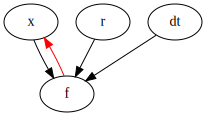

In [4]:
from graphviz import Digraph
g = Digraph('Transition')
g.node('x')
g.node('r')
g.node('dt')
g.node('f')
g.edge('x', 'f')
g.edge('r', 'f')
g.edge('dt', 'f')
g.edge('f', 'x', color="red")
#g.render('Function', format='png')
g

#### Using standard function defnition
Here the transition function is constructed separately and is passed as an argument while creating Transition object.

In [15]:
def func(x, r, time_step):
    return x + r * time_step

x = make_node("S:x:1:m")
r = make_node("P:r:0.1:1/s")
dt = make_node("P:dt:0.2:s")

f = Transition(
    name="f",
    parents=[x, r, dt],
    children=x,
    func=func
)

In [16]:
# Let us create some helper functions

def print_computational_graph(*args):
    # Print the entire computational graph
    for i in args:
        print(i)

def testing_transition(x):
    # Test the transition
    print("State before:")
    print(x)
    print("Evaluating the next step.")
    f.forward()
    print("State before transitioning:")
    print(x)
    x.transition()
    print("State after transitioning:")
    print(x)

In [17]:
print_computational_graph(x, r, dt, f)

x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

r:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.1
  units: 1/s
  track: true

dt:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.2
  units: s
  track: true

f:
  description: ''
  owner: ''
  parents: ('x', 'r', 'dt')
  children: ('x',)
  func: !!python/name:__main__.func ''



In [18]:
testing_transition(x)

State before:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

Evaluating the next step.
State before transitioning:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

State after transitioning:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1.02
  units: m
  track: true



#### Using lambda
Here Python's lambda function feature is used to create a Transition object. This is compact than the previously mentioned way of making a Transition object.

In [19]:
x = make_node("S:x:1:m")
r = make_node("P:r:0.1:1/s")
dt = make_node("P:dt:0.2:s")

f = Transition(
    name="f",
    parents=[x, r, dt],
    children=x,
    func= lambda x, r, time_step: x + r * time_step
)

In [20]:
print_computational_graph(x, r, dt, f)

x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

r:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.1
  units: 1/s
  track: true

dt:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.2
  units: s
  track: true

f:
  description: ''
  owner: ''
  parents: ('x', 'r', 'dt')
  children: ('x',)
  func: !!python/name:__main__.%3Clambda%3E ''



In [21]:
testing_transition(x)

State before:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

Evaluating the next step.
State before transitioning:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

State after transitioning:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1.02
  units: m
  track: true



#### Using python decorator @make_function
The Transition object ```f``` is created under the decorator as shown below. The child node ```x``` is given as argument to ```@make_function```. The parent nodes ```x, r, dt``` are given as argument to the function ```f``` defined under the decorator. The function ```f``` evaluates the functional form and returns the value to be assigned to the child node.

In [22]:
x = make_node("S:x:1:m")
r = make_node("P:r:0.1:1/s")
dt = make_node("P:dt:0.2:s")

@make_function(x)
def f(x=x, r=r, dt=dt):
    return x + r * dt

In [23]:
print_computational_graph(x, r, dt, f)

x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

r:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.1
  units: 1/s
  track: true

dt:
  description: ''
  owner: ''
  parents: ()
  children: ('f',)
  value: 0.2
  units: s
  track: true

f:
  description: ''
  owner: ''
  parents: ('x', 'r', 'dt')
  children: ('x',)
  func: !!python/name:__main__.f ''



In [24]:
testing_transition(x)

State before:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

Evaluating the next step.
State before transitioning:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1
  units: m
  track: true

State after transitioning:
x:
  description: ''
  owner: ''
  parents: ('f',)
  children: ('f',)
  value: 1.02
  units: m
  track: true



### Transition with multiple states

Here we consider a transition function ```g``` which takes input nodes ```x1, x2, r, dt```. The function evaluates the function expression using the input node values and updates the next value of the states ```x1 & x2```. The graph of this function is as shown below. Note the two way connections between the transition function ```g``` and the states ```x1 & x2```. One of the order of evaluations of this graph will be: ``` x1, r, dt, x2, x1, x2```.

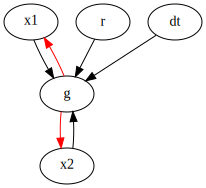

In [5]:
from graphviz import Digraph
g = Digraph('Transition')
g.node('x1', label='<x<sub>1</sub>>')
g.node('x2', label='<x<sub>2</sub>>')
g.node('r')
g.node('dt')
g.node('g')
g.edge('x1', 'g')
g.edge('x2', 'g')
g.edge('r', 'g')
g.edge('dt', 'g')
g.edge('g', 'x1', color="red")
g.edge('g', 'x2', color="red")
#g.render('Function', format='png')
g

In [25]:
x1 = make_node("S:x1:1.0:m")
x2 = make_node("S:x2:2.0:m")

@make_function(x1, x2)
def g(x1=x1, x2=x2, r=r, dt=dt):
    return (
        x1 + r * dt,
        x2 + x1 * dt
    )

In [26]:
print_computational_graph(x1, x2, r, dt, g)

x1:
  description: ''
  owner: ''
  parents: ('g',)
  children: ('g',)
  value: 1.0
  units: m
  track: true

x2:
  description: ''
  owner: ''
  parents: ('g',)
  children: ('g',)
  value: 2.0
  units: m
  track: true

r:
  description: ''
  owner: ''
  parents: ()
  children: ('f', 'g')
  value: 0.1
  units: 1/s
  track: true

dt:
  description: ''
  owner: ''
  parents: ()
  children: ('f', 'g')
  value: 0.2
  units: s
  track: true

g:
  description: ''
  owner: ''
  parents: ('x1', 'x2', 'r', 'dt')
  children: ('x1', 'x2')
  func: !!python/name:__main__.g ''



In [28]:
print("State before:")
print(x1)
print(x2)
print("Evaluating the next step.")
g.forward()
x1.transition()
x2.transition()
print("State after transitioning:")
print(x1)
print(x2)

State before:
x1:
  description: ''
  owner: ''
  parents: ('g',)
  children: ('g',)
  value: 1.02
  units: m
  track: true

x2:
  description: ''
  owner: ''
  parents: ('g',)
  children: ('g',)
  value: 2.2
  units: m
  track: true

Evaluating the next step.
State after transitioning:
x1:
  description: ''
  owner: ''
  parents: ('g',)
  children: ('g',)
  value: 1.04
  units: m
  track: true

x2:
  description: ''
  owner: ''
  parents: ('g',)
  children: ('g',)
  value: 2.4040000000000004
  units: m
  track: true

